# Projeto classificação de culturas - Ferramenta de previsão de cultura por analise de solo e clima

### Contexto

No meu projeto, qualquer pessoa que tenha informações sobre o solo e o clima de uma determinada região pode utilizar a plataforma para descobrir quais culturas são mais adequadas para serem cultivadas nesse ambiente.

Os usuários criam um perfil e fornecem os dados de solo e clima da região em questão.

Ao criar a consulta, os usuários podem incluir uma variedade de informações, como tipo de solo, nível de precipitação, temperatura média, pH do solo e outras características relevantes. Quanto mais detalhadas forem as informações fornecidas, mais precisas serão as recomendações feitas pela plataforma.

Em resumo, o projeto oferece uma plataforma intuitiva e personalizável para ajudar os agricultores, jardineiros e outros interessados em agricultura

### Nosso objetivo

Construir um modelo de previsão de cultura para cultivo em uma determinada região

### O que temos disponível, inspirações e créditos

As bases de dados foram retiradas do site kaggle: https://www.kaggle.com/datasets/varshitanalluri/crop-recommendation-dataset?resource=download

Elas estão disponíveis para download abaixo da aula (se você puxar os dados direto do Kaggle pode ser que encontre resultados diferentes dos meus, afinal as bases de dados podem ter sido atualizadas).

Caso queira uma outra solução, podemos olhar como referência a solução do usuário renjiabarai do kaggle no Notebook: https://www.kaggle.com/code/renjiabarai/crop-recommendation-prediction
Você vai perceber semelhanças entre a solução que vamos desenvolver aqui e a dele, mas também algumas diferenças significativas no processo de construção do projeto.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("Crop_Recommendation.csv")

## Tratamento de dados e análise exploratória

- Analise de tipos de colunas e seus valores

In [4]:
df.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


- Analises de correlação

C:\Users\ruana\AppData\Local\Temp\ipykernel_24528\2935234412.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Greens')


<Axes: >

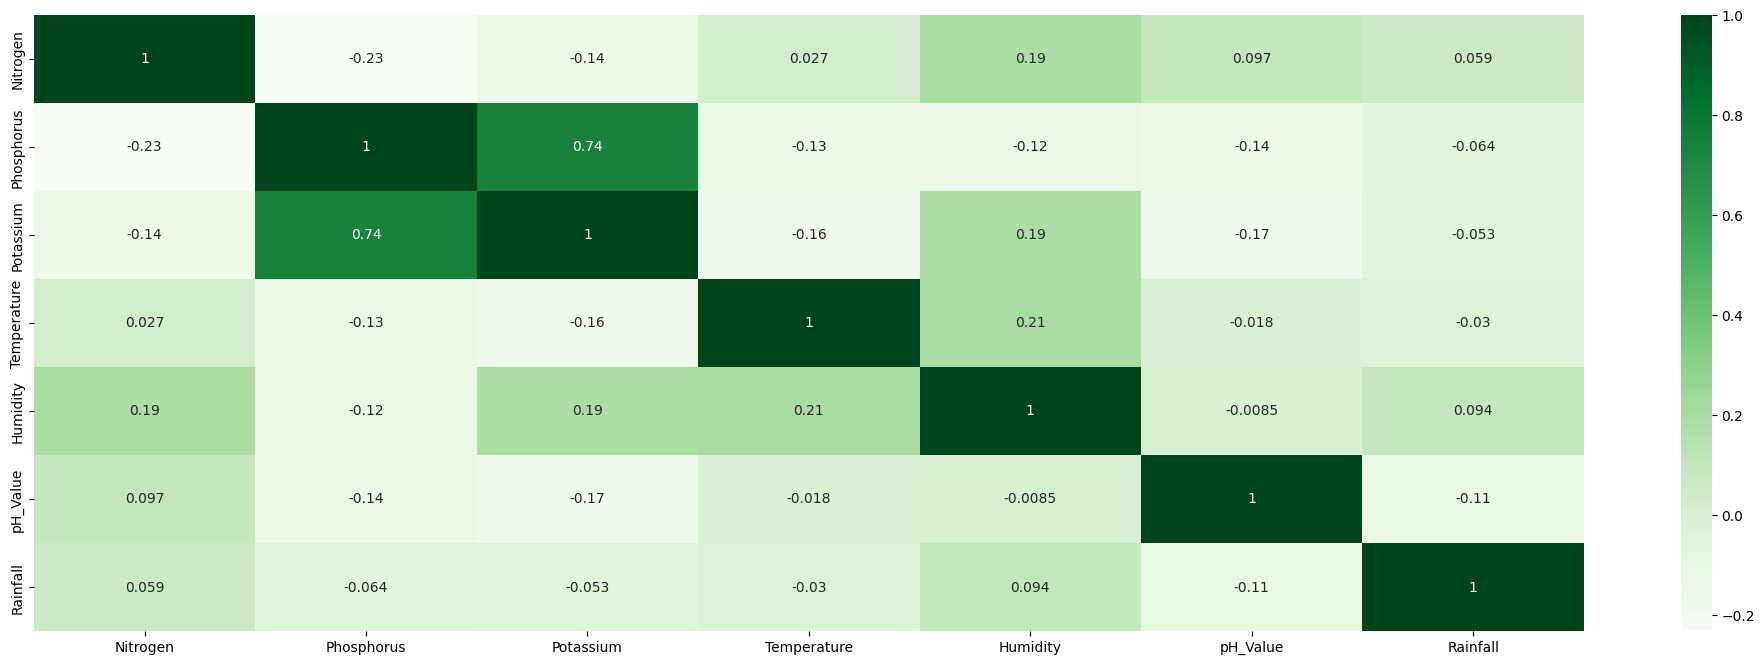

In [23]:
fig = plt.figure(figsize = (25,8))

sns.heatmap(df.corr(), annot=True, cmap='Greens')

In [77]:
df_group = df['Crop'].value_counts().reset_index()
df_group.columns = ['Crop', 'Count']

# Criando o gráfico de barras com Plotly Express
fig = px.bar(df_group, y='Crop', x='Count', 
             title='Contagem de Culturas', 
             labels={'Crop': 'Cultura', 'Count': 'Contagem'},
             text_auto=True,
             color = 'Crop',
             orientation='h')

fig.update_layout(width=700, height=650)

## Tratamento de colunas

#### Por conta de cada coluna ter seus valores bem explicados e terem um categoria bem definida, não excluirei nenhum valor de nenhuma coluna, os outliers não devem atrapalhar o modelo

- Função para criação de gráficos

In [78]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.subplots as sp

def diagrama_caixa(coluna):
    # Calculando os quartis
    Q1 = coluna.quantile(0.25)
    Q3 = coluna.quantile(0.75)
    IQR = Q3 - Q1
    
    # Limites para os dados sem outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrando os dados sem outliers
    dados_sem_outliers = coluna[(coluna >= limite_inferior) & (coluna <= limite_superior)]
    # Criando subplots
    fig = sp.make_subplots(rows=1, cols=2, subplot_titles=('Com Outliers', 'Sem Outliers'))
    # Box plot com outliers
    fig.add_trace(go.Box(x=coluna, boxmean='sd', name='Com Outliers'), row=1, col=1)
    # Box plot sem outliers
    fig.add_trace(go.Box(x=dados_sem_outliers, boxmean='sd', name='Sem Outliers'), row=1, col=2)
    # Atualizando layout
    fig.update_layout(title='Diagrama de Caixa', yaxis_title=coluna.name)
    fig.show()

In [88]:
diagrama_caixa(df['Nitrogen'])

In [89]:
diagrama_caixa(df['Phosphorus'])

In [91]:
diagrama_caixa(df['Potassium'])

In [94]:
diagrama_caixa(df['Humidity'])

In [96]:
diagrama_caixa(df['Rainfall'])

In [97]:
df[df['Rainfall'] > 215]

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,Rice
...,...,...,...,...,...,...,...,...
1865,15,28,32,28.842710,99.643285,6.218572,224.401668,Coconut
1867,3,23,30,29.701432,95.657544,6.078807,215.196804,Coconut
1881,19,30,30,29.565492,91.408963,5.826381,224.831573,Coconut
1892,3,9,35,26.916419,99.846716,6.318553,225.632366,Coconut


In [111]:
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


## Treinar modelos

In [128]:
from sklearn.model_selection import train_test_split

from sklearn.tree import ExtraTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
import joblib

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

- Função para validar modelos

### - Parâmetros utilizados para avaliar os modelos

1. Accuracy (Acurácia): A proporção de exemplos classificados corretamente em relação ao total de exemplos.

2. Precision (Precisão): A proporção de exemplos positivos que foram classificados corretamente como positivos em relação a todos os exemplos classificados como positivos.

3. Recall (Revocação): A proporção de exemplos positivos que foram classificados corretamente como positivos em relação a todos os exemplos que são realmente positivos.

4. F1-Score: A média harmônica entre precisão e revocação. É útil quando há um desequilíbrio entre as classes.

In [129]:
def avaliar_modelo_classificacao(nome_modelo, y_true, y_pred):
    # Calculando as métricas
    accuracy = accuracy_score(y_true, y_pred) # Uma alta acurácia geralmente indica um bom desempenho do modelo
    precision = precision_score(y_true, y_pred, average='weighted') # Uma alta precisão indica que o modelo tem uma baixa taxa de falsos positivos
    recall = recall_score(y_true, y_pred, average='micro') # Uma alta revocação indica que o modelo tem uma baixa taxa de falsos negativos
    f1 = f1_score(y_true, y_pred, average='weighted') # Um F1-Score alto indica um bom equilíbrio entre precisão e revocação.
    
    # Retornando as métricas
    return f"Modelo {nome_modelo}:\nAccuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-Score: {f1}"

In [127]:
modelo_et = ExtraTreeClassifier()
modelo_gp = GaussianProcessClassifier()
modelo_mlp = MLPClassifier()

modelos = {'MLPClassifier' : modelo_mlp,
            'GaussianProcessClassifier' : modelo_gp,
            'ExtraTreeClassifier' : modelo_et}

# Dividir os dados em características (X) e rótulos de classe (y)
X = df.drop('Crop', axis=1)
y = df['Crop']

# Codificar os rótulos de classe para valores numéricos
le = LabelEncoder()
y = le.fit_transform(y)
joblib.dump(le, 'label_encoder.joblib')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

for nome_modelo, modelo in modelos.items():
    # Treinar 
    modelo.fit(X_train, y_train)
    # Testas
    previsao = modelo.predict(X_test)
    print(avaliar_modelo_classificacao(nome_modelo, y_test, previsao))

Modelo MLPClassifier:
Accuracy: 0.9568181818181818
Precision: 0.9612787531447818
Recall: 0.9568181818181818
F1-Score: 0.9566925063594345
Modelo GaussianProcessClassifier:
Accuracy: 0.6409090909090909
Precision: 0.9009986225895317
Recall: 0.6409090909090909
F1-Score: 0.698541925702696
Modelo ExtraTreeClassifier:
Accuracy: 0.9068181818181819
Precision: 0.9123664308297014
Recall: 0.9068181818181819
F1-Score: 0.9082371532781758


C:\Users\ruana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



- Com base nos modelos utilizados, podemos determinar que o modelo MLPClassifier se saiu superior aos demais

    - Modelo MLPClassifier:
    - Accuracy: 0.9613636363636363
    - Precision: 0.9637109548205806
    - Recall: 0.9613636363636363
    - F1-Score: 0.960852510555307

### Análise do Melhor Modelo

#### - Colunas com mais importância para o modelo 

In [134]:
# Acessar os pesos dos coeficientes da primeira camada oculta
coeficientes_camada_oculta = modelo_mlp.coefs_[0]

# Criar um DataFrame para armazenar os pesos dos coeficientes e associá-los às características
importancia = pd.DataFrame(data=coeficientes_camada_oculta.T, columns=X_train.columns)

# Calcular a média dos pesos dos coeficientes para cada característica para obter uma medida de importância
importancia_media = importancia.abs().mean()

print(importancia_media)


Nitrogen       0.106071
Phosphorus     0.105429
Potassium      0.111284
Temperature    0.119665
Humidity       0.111975
pH_Value       0.114159
Rainfall       0.097082
dtype: float64


In [136]:
df.to_parquet('dados finais.parquet')

In [137]:
import joblib
joblib.dump(modelo_mlp, 'modelo.joblib')

['modelo.joblib']